In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Importing the Cleveland data
df_cleveland = pd.read_csv("/Users/mani/Desktop/heart-disease-predictor/data/cleveland_data.csv", index_col=0)

In [3]:
df_cleveland.head()

,age,sex,cp,trest,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [4]:
# Creating a benchmark model

# Importing the logistic regression model
from sklearn.linear_model import LogisticRegression

# Creating a logistic regression model
lr_classifier = LogisticRegression(tol=1e-6, solver='liblinear', max_iter=200,)

In [5]:
# Separting the data into features and labels
X = df_cleveland.loc[:, df_cleveland.columns != "num"]
y = df_cleveland["num"]

In [13]:
# Importing the cross validation function
from sklearn.model_selection import cross_validate

def cross_validation(model):
    """
    Performs cross validation and displays evaluation metrics
    param model: A scikit-learn estimator object
    return: Display evaluation metrics
    """
    # Training the model using cross validation
    cv_results = cross_validate(model, X, y, cv=8,
                                scoring=["recall", "precision", "accuracy"],
                                return_train_score=True)
    
    # Displaying the training accuracy metrics
    print("The mean training accuracy is", cv_results["train_accuracy"].mean())
    print("The mean training recall is", cv_results["train_recall"].mean())
    print("The mean training precision is", cv_results["train_precision"].mean())

    print('\n')

    # Displaying the test accuracy metrics
    print("The mean test accuracy is", cv_results["test_accuracy"].mean())
    print("The mean test recall is", cv_results["test_recall"].mean())
    print("The mean test precision is", cv_results["test_precision"].mean())

In [14]:
# Evaluating the benchmark model
cross_validation(lr_classifier)

The mean training accuracy is 0.8552123552123552
The mean training recall is 0.8175245098039216
The mean training precision is 0.862710321716577


The mean test accuracy is 0.8412162162162162
The mean test recall is 0.7965686274509804
The mean test precision is 0.8657186950046858


/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/yellowbrick/model_selection/importances.py:195: YellowbrickWarning: detected multi-dimensional feature importances but stack=False, using mean to aggregate them.
  YellowbrickWarning,


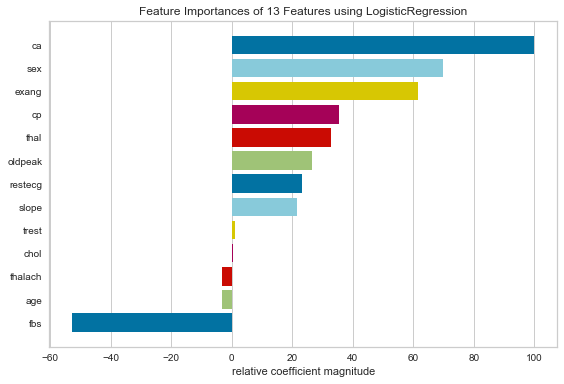

/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


FeatureImportances(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fee61b91310>,
                   model=None)

In [15]:
# Visualzing the feature importance from the logistic regression model

# Importing the function
from yellowbrick.model_selection.importances import feature_importances

# Creating the graph
feature_importances(lr_classifier, X, y)

In [16]:
# Creating a random forest model

# Importing the logistic regression model
from sklearn.ensemble import RandomForestClassifier

# Creating a logistic regression model
rf_classifier = RandomForestClassifier(n_estimators=150)

In [17]:
# Evaluating the model
cross_validation(rf_classifier)

The mean training accuracy is 1.0
The mean training recall is 1.0
The mean training precision is 1.0


The mean test accuracy is 0.8108108108108109
The mean test recall is 0.7593954248366013
The mean test precision is 0.8255689775910364


/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


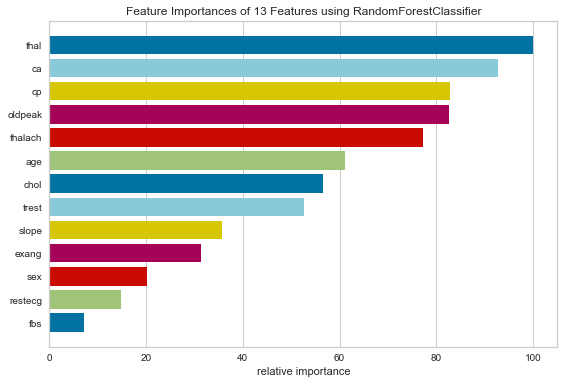

/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


FeatureImportances(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fee61df04d0>,
                   model=None)

In [18]:
# Visualzing the feature importance for the random forest model

# Creating the graph
feature_importances(rf_classifier, X, y)

In [19]:
# Importing the model class
from sklearn.neighbors import KNeighborsClassifier

# Creating the model
knn_classifier = KNeighborsClassifier(n_neighbors=3)

In [20]:
cross_validation(knn_classifier)

The mean training accuracy is 0.7717181467181466
The mean training recall is 0.742454481792717
The mean training precision is 0.7592709693999404


The mean test accuracy is 0.652027027027027
The mean test recall is 0.6123366013071896
The mean test precision is 0.6287463450292397


In [21]:
from sklearn.naive_bayes import GaussianNB

# Creating the model
nb_classifier = GaussianNB()

In [22]:
cross_validation(nb_classifier)

The mean training accuracy is 0.8527992277992278
The mean training recall is 0.8091911764705882
The mean training precision is 0.8644866074334999


The mean test accuracy is 0.831081081081081
The mean test recall is 0.7888071895424836
The mean test precision is 0.8483696042519572


In [23]:
from sklearn.svm import SVC

# Creating the model
svm_classifier = SVC()

In [24]:
cross_validation(svm_classifier)

The mean training accuracy is 0.6805019305019305
The mean training recall is 0.5047006302521009
The mean training precision is 0.7210603184054574


The mean test accuracy is 0.6655405405405406
The mean test recall is 0.4742647058823529
The mean test precision is 0.7114448051948052


In [25]:
from sklearn.ensemble import GradientBoostingClassifier

gbm_classifier = GradientBoostingClassifier()

In [26]:
cross_validation(gbm_classifier)

The mean training accuracy is 0.9942084942084942
The mean training recall is 0.9916491596638656
The mean training precision is 0.9958242867815288


The mean test accuracy is 0.7905405405405406
The mean test recall is 0.767156862745098
The mean test precision is 0.8020652834652447


/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


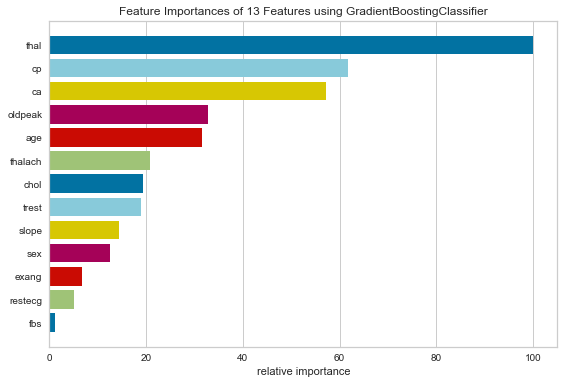

/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


FeatureImportances(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fee61e34fd0>,
                   model=None)

In [27]:
# Visualizing the feature importance
feature_importances(gbm_classifier, X, y)

In [28]:
# Use log to transform the skewed variables to a normal distribution
X["trest"] = np.log(X["trest"])
X["chol"] = np.log(X["chol"])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


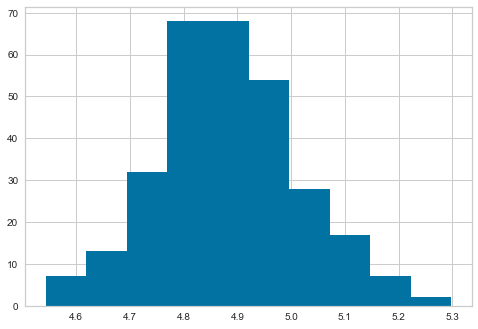

In [29]:
# Plotting the distributions to see if they are now normally distributed
X["trest"].hist()

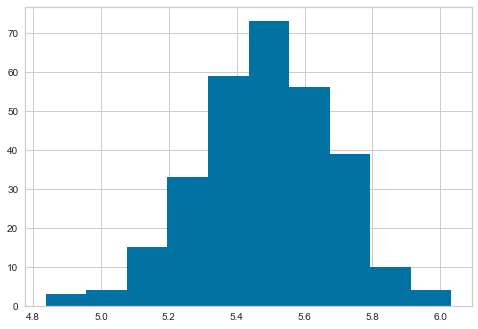

In [30]:
X["chol"].hist()

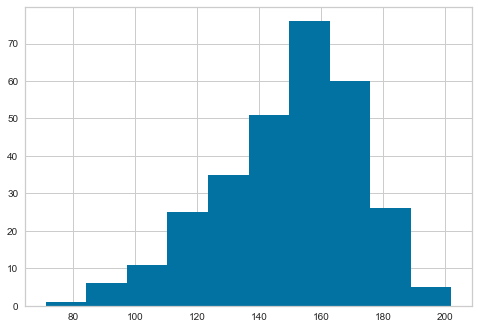

In [31]:
X["thalach"].hist()

In [32]:
# Retraining the logistic regression model with the log transformed data
lr_classifier = LogisticRegression(tol=1e-6, solver='liblinear', max_iter=200)
cross_validation(lr_classifier)

The mean training accuracy is 0.8566602316602316
The mean training recall is 0.8164740896358543
The mean training precision is 0.8662112623927075


The mean test accuracy is 0.8513513513513513
The mean test recall is 0.8035130718954248
The mean test precision is 0.8753618113912232


In [33]:
X["oldpeak"] = np.log(X["oldpeak"])

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [34]:
# Import the data that has the original response labels
df_orig = pd.read_csv("/Users/mani/Desktop/heart-disease-predictor/data/cleveland_data_orig.csv", index_col=0)

In [35]:
df_orig.head()

,age,sex,cp,trest,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [36]:
# Dropping the null values in the dataframe
df_orig.dropna(inplace=True)

In [37]:
# Getting a feature matrix and a vector of labels
X_orig = df_orig.loc[:, df_orig.columns != "num"]
y_orig = df_orig["num"]

In [38]:
from sklearn.model_selection import train_test_split

# Witholding 10% of our data before oversampling
X_train, X_test, y_train, y_test = train_test_split(
     X_orig, y_orig, test_size=0.10)

In [39]:
# Importing the SMOTE class in order to oversample the positive class
from imblearn.over_sampling import SMOTE

# Creating the SMOTE model
smote = SMOTE()

In [40]:
X_orig_over, y_orig_over = smote.fit_resample(X_orig, y_orig)

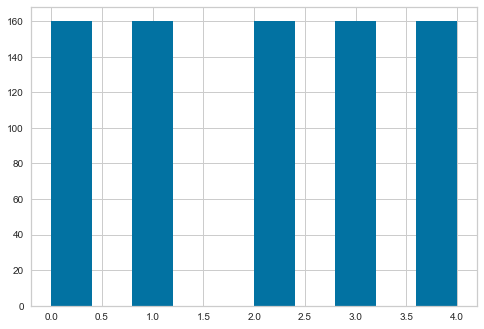

In [43]:
y_orig_over.hist()

In [57]:
# Creating a logistic regression model to be trained on the oversampled data
lr_classifier = LogisticRegression(tol=1e-6, max_iter=20000)

In [58]:
# Evaluating using cross validation
cross_validate(lr_classifier, X_orig_over, y_orig_over)

{'fit_time': array([4.430264  , 3.25975227, 2.98417211, 4.91029   , 4.58770204]),
 'score_time': array([0.001863  , 0.00166082, 0.00166297, 0.0016551 , 0.00165606]),
 'test_score': array([0.525 , 0.5875, 0.6375, 0.6125, 0.575 ])}